### Covariance and Linear Estimator

Author: Arun Prakash A, arunprakash.ece@kongu.ac.in

   * Often times, statistical averages such as mean, variance, $n$th order moments, correlation and covariance are sufficient to describe the random process.
   * Joint PDF of all RVs are not often necessary (also difficult to estimate)
   * A random process could be viewd as a vector with a collection of indexed RVs. $x(n) = \{x_1,x_2, \cdots , x_N\}$ where each $x_i \sim P(x_i)$ and often $x_i, i=1,2,\cdots,N $ assumed to follow iid.
   * Recall the central limit theorem for independent trails : https://en.wikipedia.org/wiki/Central_limit_theorem
   * Cov[$(x_i-m_x)(x_j-m_y)]$ 
   * Covaraince equals to Correlation if mean of Rv is zero
   
    $$ COV(X,Y) =  \sum_i \sum_j p(x_i,y_j) (x_i-m_x)(y_j-m_y)$$ which is an inner product between the vectors, In the case of uniform probabability distribution $p_i = \frac{1}{n}$. 
    
   * Visit to know more https://en.wikipedia.org/wiki/Covariance
   

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

For the sake of completeness let us start from the ensemble average of a single random variable (that is mean). Let us observe how the mean of the observed outcomes **asymptotically** converges to the mean of original distribution **(or population mean)** as we take more number of samples (Central limit theorem). Here we consider a rolling die as an example.

With 1000 observations from a uniform distribution

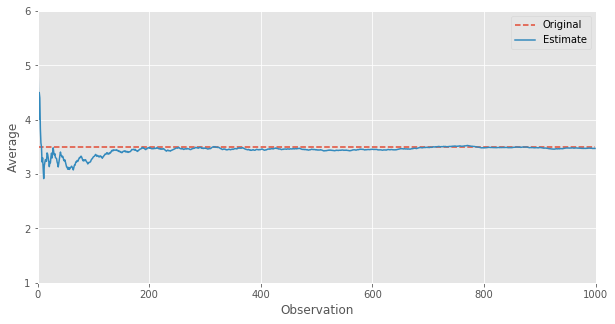

In [2]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
n=1000
mu = []
#original mean (3.5)
for i in range(n):
    mu.append(3.5)
ax.plot(mu,'--',label='Original')
# Observation   
x = []
avg = []
for i in range(n):
    x.append(np.random.randint(1,7))
    avg.append(sum(x)/(i+1))

ax.plot(avg,label='Estimate')
ax.set_xlim(0,n)
ax.set_ylim(1,6)
ax.legend()
ax.set_xlabel('Observation')
ax.set_ylabel('Average')
plt.show()

With 1000 observation from gaussian distribution with  mean 2

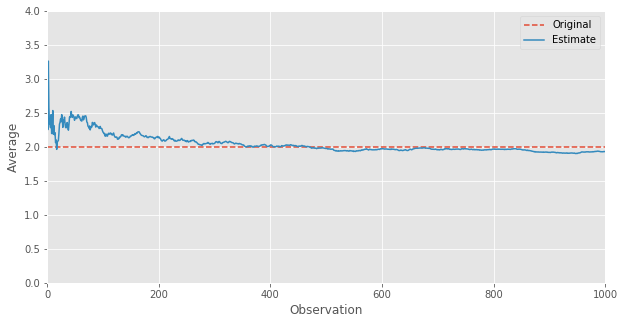

In [3]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
n=1000
mu = []
#original mean (3.5)
for i in range(n):
    mu.append(2)
ax.plot(mu,'--',label='Original')
# Observation   
x = []
avg = []
for i in range(n):
    x.append(np.random.normal(loc=2,scale=2))
    avg.append(sum(x)/(i+1))

ax.plot(avg,label='Estimate')
ax.set_xlim(0,n)
ax.set_ylim(0,4)
ax.legend()
ax.set_xlabel('Observation')
ax.set_ylabel('Average')
plt.show()

We can output a sample based on a custom distribution as well. Let us take a toy example, again, rolling a die with the custom distribution.

In [4]:
die = np.array([1,2,3,4,5,6])
prob = np.array([0.01,0.2,0.1,0.1,0.1,0.49])
mean =np.dot(die,prob)
print('The mean is:',mean)

The mean is: 4.55


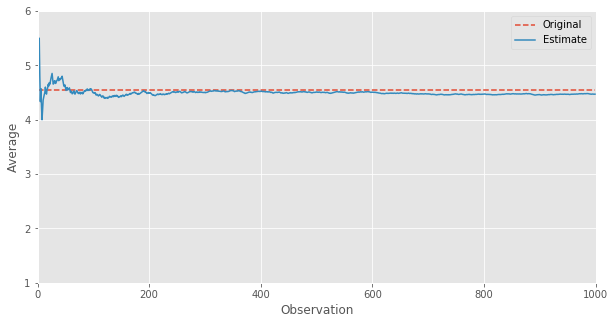

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
n=1000
mu = []
#original mean (3.5)
for i in range(n):
    mu.append(mean)
ax.plot(mu,'--',label='Original')
# Observation   
x = []
avg = []
for i in range(n):
    x.append(np.random.choice(a=die,size=1,p=prob))
    avg.append(sum(x)/(i+1))

ax.plot(avg,label='Estimate')
ax.set_xlim(0,n)
ax.set_ylim(1,6)
ax.legend()
ax.set_xlabel('Observation')
ax.set_ylabel('Average')
plt.show()

Let us move on to the collection of random variables. <br>

 * Two random variables are always jointly distributed. They could be statistically independent (ex,pair of outcomes by rolling two dice) or may not (number of cars coming to the service station and money generated for the service).
 
 * In such a case, we can use second-order ensemble averages such as correlation and covariance (Though the original distribution is unknown) with an ensemble of observations.
 

In [6]:
#Let us manually create the distribution
x1 = np.array([1,2,3,4,5,6])
x2 = np.array([1,2,3,4,5,6])
y = []
for i in x1:
    for j in x2:
        y.append((i,j))
print('All the possible outcomes:')
print('='*len('All the possible outcomes:'))
print(y)

All the possible outcomes:
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [7]:
mu = np.mean(np.array(y))
print(mu)

3.5


Let us compute covaraince and correlation. All outcomes are equally likely, therefore $p_i=\frac{1}{36}$

In [8]:
z1 = (x1-mu).reshape(1,6)
z2 = (x2-mu).reshape(1,6)
p = 1/36
cov = (1/36)*np.sum(np.matmul(z1.transpose(),z2))
print('Covariance between x1,x2 is:\t',cov)

Covariance between x1,x2 is:	 0.0


Suppose we don't know the probability distribution of the observed samples and also the range of the R.Vs. Can we use the same formula to compute the covariance? (**This is important, later we discuss the same concept formally as "Bias" and "Variance" of the estimator**) <br>  
 * Will the sample mean and variance converges to the original mean and variance? 

In [9]:
# Let us start with 10 observations
x1 = np.random.randint(1,7,(1,10))
x2 = np.random.randint(1,7,(1,10))
np.cov(x1,x2)

array([[2.84444444, 0.24444444],
       [0.24444444, 2.32222222]])

In [10]:
# Let us start with 100 observations
x1 = np.random.randint(1,7,(1,100))
x2 = np.random.randint(1,7,(1,100))
np.cov(x1,x2)

array([[2.66050505, 0.05636364],
       [0.05636364, 3.07838384]])

In [11]:
# Let us compute it explicitly
mu1 = np.sum(x1)/100
mu2 = np.sum(x2)/100
z1 = (x1-mu1).reshape(1,100)
z2 = (x2-mu2).reshape(1,100)
cov = (1/100)*np.sum(z1*z2)
print('Covariance between x1,x2 is:\t',cov)

Covariance between x1,x2 is:	 0.05580000000000007


Yes, it did. Since the covariance approaches zero, we say the variables $x_1$ and $x_2$ are uncorrelated (but not necessarily statistically independent.). 

 * Recall that the ensemble avarages provides only a weaker form of independence. That is $E\{XY\}=E\{X\}E\{Y\}$
 * We can say, strongly, two random variables are independent only if their joint distributions are separable.In order to do that we should know the distribution function that generated the observations.
 * We may use $\rho_{xy}$,correlation coefficient, which scales the covaraince magnitude between $-1 \leq \rho \leq 1$. This convey the amount of correlation (negative, uncorrelated, positive) between random variables.

### Estimators

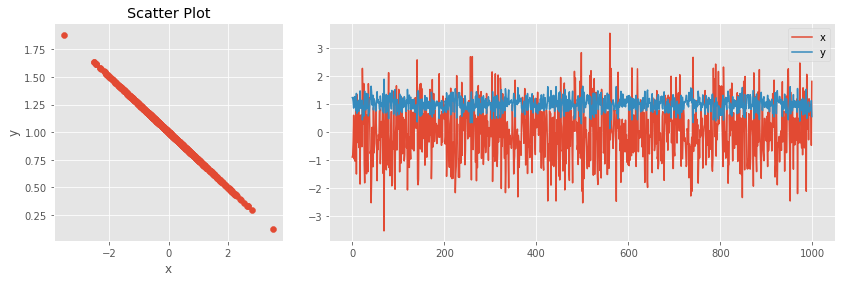

In [12]:
# Generate the linearly correlated rvs
x = np.random.normal(loc=0,scale=1,size=(1,1000)) # direct observations
y = -0.25*x+1 # Indirect observation

# Let us create a layout
gridsize = (1,3)
fig = plt.figure(figsize=(14,4))
ax0 = plt.subplot2grid(gridsize,(0,1),colspan=2,rowspan=1)
ax1 = plt.subplot2grid(gridsize,(0,0),colspan=1,rowspan=1)
ax0.plot(x[0],label='x')
ax0.plot(y[0],label='y')
ax0.legend()
ax1.scatter(x,y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Scatter Plot')
plt.show()

### The Optimum Linear mean Square estimator
( Refer Page 69 for derivation, Hayes)

 * What we have is only a partial  observation of $x$ and $y$. We make an assumption that $x$ and $y$ are linearly correlated.
 * $$a = \frac{E\{XY\}-m_xm_y}{\sigma_x^2}$$
 * $$b = \frac{E\{X^2\}m_y - E\{XY\}m_x}{\sigma_x^2}$$

In [13]:
# Pretend, we have only 10 partial observations
x1 = x[:,0:10] # Keep the dimention as input dim
y1 = y[:,0:10]

In [14]:
mx = np.sum(x1)/x1.size
my = np.sum(y1)/y1.size # observe the mean of y
print(mx,my)

-0.409608405945246 1.1024021014863115


In [15]:
cov = np.cov(x1,y1)
E_xy = cov[0,1]
print(E_xy)

-0.16370143489835737


In [16]:
E_x2 = np.mean(x1**2)
print(E_x2)

0.757104211855092


In [17]:
a = (E_xy-mx*my)/cov[0,0]
b = (E_x2*my-E_xy*mx)/cov[0,0]
print('The estimated value of a is {0} and b is {1}'.format(a,b))

The estimated value of a is 0.43959867056276536 and b is 1.1722252020425439


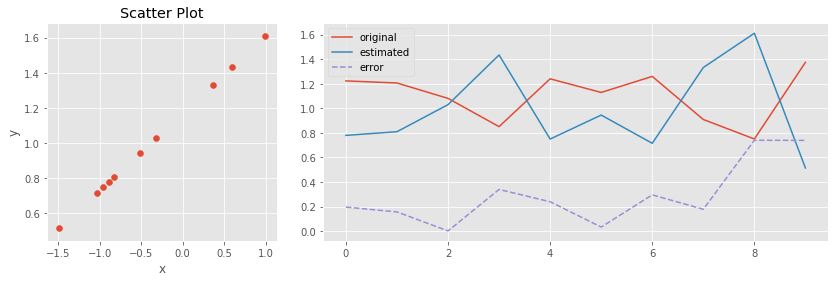

In [18]:
y1 = a*x1+b
gridsize = (1,3)
fig = plt.figure(figsize=(14,4))
ax0 = plt.subplot2grid(gridsize,(0,1),colspan=2,rowspan=1)
ax1 = plt.subplot2grid(gridsize,(0,0),colspan=1,rowspan=1)
ax0.plot(y[0,0:10],label='original')
ax0.plot(y1[0],label='estimated')
ax0.plot(np.square(y1[0]-y[0,0:10]),'--',label='error')
ax0.legend()
ax1.scatter(x1,y1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Scatter Plot')
plt.show()

In [19]:
error = np.sum(np.square(y1[0]-y[0,0:10]))
print('MSE:',error)

MSE: 2.924043215306882


**As we can see, the error is quite high.We need more observation (reasonably more)**

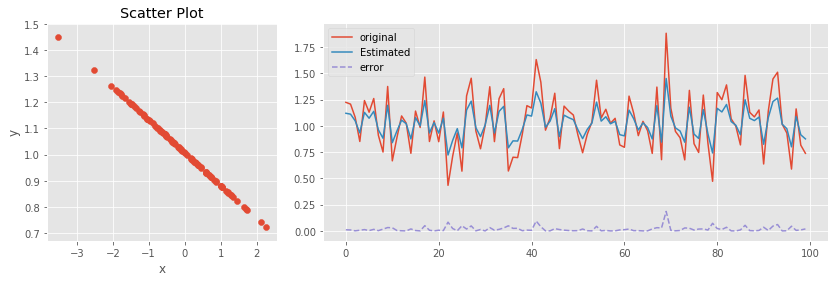

In [20]:
x1 = x[:,0:100] 
y1 = y[:,0:100]
mx = np.sum(x1)/x1.size
my = np.sum(y1)/y1.size 
cov = np.cov(x1,y1)
E_xy = cov[0,1]
E_x2 = np.mean(x1**2)
a = (E_xy-mx*my)/cov[0,0]
b = (E_x2*my-E_xy*mx)/cov[0,0]
# Plotting
y1 = a*x1+b
gridsize = (1,3)
fig = plt.figure(figsize=(14,4))
ax0 = plt.subplot2grid(gridsize,(0,1),colspan=2,rowspan=1)
ax1 = plt.subplot2grid(gridsize,(0,0),colspan=1,rowspan=1)
ax0.plot(y[0,0:100],label='original')
ax0.plot(y1[0],label='Estimated')
ax0.plot(np.square(y1[0]-y[0,0:100]),'--',label='error')
ax0.legend()
ax1.scatter(x1,y1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Scatter Plot')
plt.show()

In [21]:
error = np.sum(np.square(y1[0]-y[0,0:100]))
print('MSE:',error)

MSE: 1.7937861708481468


**Rembemebr that the estimator works perfectly well for linearly correlated random variables. For non-linearly correlated random variables, the optimum estimator is not linear** <br> 
Refer the book to know more about "bias" and "variance" of an estimator.Also, know why gaussian random variables are of particular interest in the study of natural signals such as speech, audio,video..